# Capital Asset Pricing Model ~ Systematic Trading Strategy

The CAPM strategy assumes that common investment risk factors such as industry, capital structure and macroeconomic factors can be summarised in one broad indicator, market risk. Market returns can be used as a statistic to summarise total risk exposure within a particular market. This is usually achieved by .

The CAPM takes the form of a linear regression:

\begin{align}
R_S = \alpha + r_f + \beta (R_M - r_f) + \varepsilon_S \\
\end{align}
Where:
\begin{align*}
R_S = \text{Expected return of the stock}\\
\alpha = \text{Risk-adjusted return}\\
\beta = \text{Sensitivity of asset to market risk}\\
(R_M - r_f) = \text{Market risk premium}\\
\varepsilon_S = \text{Noise term associated with deviation}\\
\text{from regression line}
\end{align*}

**Strategy aim:** This strategy will aim to minimise the $\varepsilon_S$ term through an Ordinary Least Squares Regression and calculate $\alpha$ and $\beta$ for each stock, then generate trading signals using a Relative Momentum Strategy, which assigns higher weighting to stocks with the highest risk-adjusted return $\alpha$.




## Displaying the Data: Adjusted Close Price

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yahoo_fin import stock_info

start_date = '2015-12-31'
end_date = '2020-12-31'

tickers = ['^GSPC',
           'AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB',
           'INTC', 'TSLA', 'NVDA', 'CSCO', 'ORCL']

data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = stock_info.get_data(ticker, start_date, end_date)['adjclose']
data

,^GSPC,AAPL,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL
2015-12-31,2043.939941,24.199886,50.102814,758.880005,675.890015,104.660004,29.135853,48.001999,8.053996,22.181568,32.905697
2016-01-04,2012.660034,24.220581,49.488720,741.840027,636.989990,102.220001,28.746813,44.681999,7.909824,21.737114,32.335869
2016-01-05,2016.709961,23.613628,49.714497,742.580017,633.789978,102.730003,28.611492,44.686001,8.036891,21.638350,32.236378
2016-01-06,1990.260010,23.151518,48.811424,743.619995,632.650024,102.970001,27.977184,43.807999,7.704566,21.407890,32.399185
2016-01-07,1943.089966,22.174412,47.113628,726.390015,607.940002,97.919998,26.928463,43.130001,7.399120,20.914049,31.693676
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,3690.010010,129.991989,218.730484,1732.380005,3185.270020,268.109985,45.051468,645.979980,129.956833,42.571609,63.821392
2020-12-24,3703.060059,130.994537,220.442551,1738.849976,3172.689941,267.399994,45.535160,661.770020,129.801987,42.725094,63.489086
2020-12-28,3735.360107,135.679626,222.629654,1776.089966,3283.959961,277.000000,45.535160,663.690002,128.865494,43.089603,63.401131
2020-12-29,3727.040039,133.873077,221.828033,1758.719971,3322.000000,276.779999,47.779518,665.989990,129.297516,42.821007,63.000416


## Calculating Daily Returns

In [73]:
returns = data.pct_change(1).iloc[1:,]
returns 

,^GSPC,AAPL,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL
2016-01-04,-0.015304,0.000855,-0.012257,-0.022454,-0.057554,-0.023314,-0.013353,-0.069164,-0.017901,-0.020037,-0.017317
2016-01-05,0.002012,-0.025059,0.004562,0.000998,-0.005024,0.004989,-0.004707,0.000090,0.016064,-0.004544,-0.003077
2016-01-06,-0.013115,-0.019570,-0.018165,0.001400,-0.001799,0.002336,-0.022170,-0.019648,-0.041350,-0.010650,0.005050
2016-01-07,-0.023700,-0.042205,-0.034783,-0.023170,-0.039058,-0.049043,-0.037485,-0.015477,-0.039645,-0.023068,-0.021776
2016-01-08,-0.010838,0.005288,0.003067,-0.016410,-0.001464,-0.006025,-0.010364,-0.021563,-0.021466,-0.024793,-0.011130
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.000746,-0.006976,-0.013039,0.005152,-0.006627,0.003819,0.008664,0.008808,-0.020259,-0.006937,0.002302
2020-12-24,0.003537,0.007712,0.007827,0.003735,-0.003949,-0.002648,0.010736,0.024444,-0.001192,0.003605,-0.005207
2020-12-28,0.008723,0.035766,0.009921,0.021416,0.035071,0.035901,0.000000,0.002901,-0.007215,0.008532,-0.001385
2020-12-29,-0.002227,-0.013315,-0.003601,-0.009780,0.011584,-0.000794,0.049288,0.003465,0.003353,-0.006233,-0.006320


## Proof of Concept: Calculating the Coefficients of the Linear Regression Model Graphically

A linear regression is fit to model the returns of two assets: AAPL, the stock in interest, and the ^GSPC stock, which represents the S&P500 index. This stock is chosen to fit the regression because it can accurately represent the US Market.

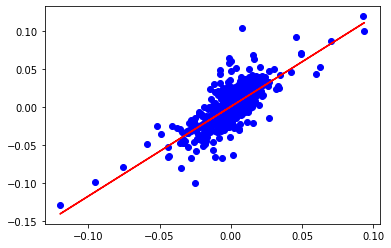

(1.1778697955897883, 0.0008837293396803196)

In [74]:
x = returns['^GSPC'].values
y = returns['AAPL'].values
m, c = np.polyfit(returns['^GSPC'].values, returns['AAPL'].values, 1)

plt.scatter(x, y, c='b')
plt.plot(x, m*x+c, c='r')
plt.show()
m, c # m=beta, c=alpha

## Proof of Concept: Calculating the Coefficients of the Linear Regression Model through Ordinary Least Squares Regression

From the CAPM formula:
\begin{align*}
R_S = \alpha + r_f + \beta (R_M - r_f) + \varepsilon_S\\
\end{align*}

This can be applied to multiple stock returns. In matrix form this would become:
\begin{gather*}    
    \begin{bmatrix} R_1 - r_f\\ R_2 - r_f\\ R_3 - r_f\\ R_4 - r_f \end{bmatrix}
    =
    \alpha \begin{bmatrix} 1\\ 1\\ 1\\ 1 \end{bmatrix}
    +
    \beta \begin{bmatrix} R_{M_1} - r_f\\ R_{M_2} - r_f\\ R_{M_3} - r_f\\ R_{M_4} - r_f \end{bmatrix}
    +
    \begin{bmatrix} \varepsilon_1\\ \varepsilon_2\\ \varepsilon_3\\ \varepsilon_4 \end{bmatrix}
\end{gather*}

\begin{gather*}    
    \begin{bmatrix} R_1 - r_f\\ R_2 - r_f\\ R_3 - r_f\\ R_4 - r_f \end{bmatrix}
    =
    \begin{bmatrix} 1 && R_{M_1} - r_f\\ 1 && R_{M_2} - r_f\\ 1 && R_{M_3} - r_f\\ 1 && R_{M_4} - r_f \end{bmatrix}
    \begin{bmatrix} \alpha\\ \beta \end{bmatrix}
    +
    \begin{bmatrix} \varepsilon_1\\ \varepsilon_2\\ \varepsilon_3\\ \varepsilon_4 \end{bmatrix}
\end{gather*}

Which can be simply written as $Y = X \beta + \varepsilon$ or $Y - X \beta = \varepsilon$. This system has no solution, but a value of $\beta$ for which the sum of squares of the error term $\varepsilon$ can be calculated.
\begin{equation*}  
\hat{\beta} = argmin_{\beta} \sum_{n=1}^{4} \varepsilon_i^2 = argmin_{\beta} \sum_{n=1}^{4} \varepsilon_i^T \varepsilon_i
\end{equation*}  

Where $\hat{\beta}$ = the $\beta$ coefficient which best fits the equation, and the $argmin_x$ of $f(x)$ is the value of $x$ for which $f(x)$ is minimum. Successively:
\begin{gather*}  
    \varepsilon^T \varepsilon = (Y - X \beta)^T (Y - X \beta)
    = Y^T Y - 2 \beta^T X^T Y + \beta^T X^T X \beta
\end{gather*}  

To find the minimum value the equation is differentiated and equated to 0:
\begin{gather*}  
    -2 X^T Y+ 2 X^T X \beta = 0 \\
    \hat{\beta} = (X^T X)^{-1} X^T Y
\end{gather*} 






In [75]:
length = len(data['^GSPC'])
reg_OLS = pd.DataFrame(columns = tickers[1:])

for ticker in tickers[1:]:
    # multiply X by X^T and taking its inverse
    x_matrix = np.asmatrix(np.vstack([np.ones(length-1), np.array(returns['^GSPC'])]))
    x_matrix = x_matrix.T
    y_matrix = np.asmatrix(returns[ticker]).T
    temporary_x = np.linalg.inv(np.matmul(x_matrix.T, x_matrix))
    # multiply result with X^T
    temporary_x = np.matmul(temporary_x, x_matrix.T)
    # multiply tesult with Y
    reg_OLS[ticker] = pd.DataFrame(np.matmul(temporary_x, y_matrix))

reg_OLS.index = ['Alpha', 'Beta']
reg_OLS

,AAPL,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL
Alpha,0.000884,0.000664,0.000218,0.000922,0.000380,-0.000068,0.002089,0.001826,0.000078,0.000117
Beta,1.177870,1.200385,1.050119,0.938805,1.078231,1.216497,1.266420,1.519541,1.071255,0.960576


## Proof of Concept: Ranking the stocks based on their $\alpha$ and $\beta$ values

In [76]:
alpha = reg_OLS.iloc[0]
beta = reg_OLS.iloc[1]

ranks = pd.DataFrame(alpha.rank(ascending=False))
ranks['Beta'] = pd.DataFrame(beta.rank(ascending=False))
ranks

,Alpha,Beta
AAPL,4.0,5.0
MSFT,5.0,4.0
GOOG,7.0,8.0
AMZN,3.0,10.0
FB,6.0,6.0
INTC,10.0,3.0
TSLA,1.0,2.0
NVDA,2.0,1.0
CSCO,9.0,7.0
ORCL,8.0,9.0


## Trading Strategy: Generating Signals

In [77]:
rolling_window = 225
signals_df = pd.DataFrame(np.zeros((length-rolling_window-1,len(tickers)-1)),columns=tickers[1:])

for i in range(length-1-rolling_window):
    
    # Ordinary Least Squares Regression
    rolling_returns = returns.iloc[i:i+rolling_window,]
    x_matrix = np.asmatrix(np.vstack([np.ones(rolling_window), np.array(rolling_returns['^GSPC'])]))
    x_matrix = x_matrix.T
    reg_OLS = pd.DataFrame(columns=tickers[1:])
    for ticker in tickers[1:]:
        y_matrix = np.asmatrix(rolling_returns[ticker]).T
        temporary_x = np.linalg.inv(np.matmul(x_matrix.T, x_matrix))
        temporary_x = np.matmul(temporary_x, x_matrix.T)
        reg_OLS[ticker] = pd.DataFrame(np.matmul(temporary_x, y_matrix))
    reg_OLS.index = ['Alpha', 'Beta']
    alpha = reg_OLS.iloc[0]
    beta = reg_OLS.iloc[1]
    ranks = pd.DataFrame(alpha.rank(ascending=False))
    ranks['Slope'] = pd.DataFrame(beta.rank(ascending=False))

    # Generating the trading signals based on the ranked values of alpha
    signals = np.zeros(len(tickers)-1)
    for j in range(len(tickers)-1):
        # arbitrary weightings
        if ranks.iloc[j,0] <= 2:
            signals[j] = 0.4
        elif ranks.iloc[j,0] >= 9:
            signals[j] = 0.1
        else:
            signals[j] = 0
    signals_df.iloc[i,] = signals.tolist()

signals_df

,AAPL,MSFT,GOOG,AMZN,FB,INTC,TSLA,NVDA,CSCO,ORCL
0,0.0,0.0,0.1,0.0,0.4,0.0,0.1,0.4,0.0,0.0
1,0.0,0.0,0.1,0.4,0.0,0.0,0.1,0.4,0.0,0.0
2,0.0,0.0,0.1,0.4,0.0,0.0,0.1,0.4,0.0,0.0
3,0.0,0.0,0.1,0.4,0.0,0.0,0.1,0.4,0.0,0.0
4,0.0,0.0,0.1,0.4,0.0,0.0,0.1,0.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1028,0.0,0.0,0.0,0.0,0.0,0.1,0.4,0.4,0.1,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.1,0.4,0.4,0.1,0.0
1030,0.0,0.0,0.0,0.0,0.0,0.1,0.4,0.4,0.1,0.0
1031,0.0,0.0,0.0,0.0,0.0,0.1,0.4,0.4,0.1,0.0


## Plotting Daily and Cumulative Returns Generated from Above Strategy

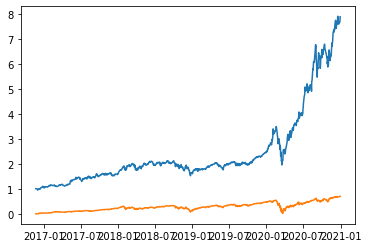

In [78]:
returns_matrix = np.asmatrix(returns.iloc[rolling_window:,1:].values)
signals_matrix = np.asmatrix(signals_df.values)

daily_returns = np.diag(np.matmul(returns_matrix+1, signals_matrix.T))
cumulative_returns = np.cumprod(daily_returns)

plt.plot(returns.index[rolling_window:], cumulative_returns)
plt.plot(returns.index[rolling_window:], np.cumprod(returns.iloc[rolling_window:,0]+1)-1)
plt.show()

# Acknowledgements

Thank you very much to Imperial College Investment Society for delivering a wonderful lecture on CAPM.